# First Passage Percolation Demo

You can either run each cell block one by one if you care to inspect what each step is doing but if you just want to get to the good stuff then you can simply press CTRL+F9 to run the entrie notebook.

Run the following once to initialize the project. (Click the play button)

In [1]:
!git clone https://github.com/DavidMichaelH/StatisticalMechanicsModels
!python StatisticalMechanicsModels/setup.py install
%cd StatisticalMechanicsModels/statistical_mechanics_models/

Cloning into 'StatisticalMechanicsModels'...


running install
running bdist_egg
running egg_info
creating statistical_mechanics_models.egg-info
writing statistical_mechanics_models.egg-info\PKG-INFO
writing dependency_links to statistical_mechanics_models.egg-info\dependency_links.txt
writing requirements to statistical_mechanics_models.egg-info\requires.txt
writing top-level names to statistical_mechanics_models.egg-info\top_level.txt
writing manifest file 'statistical_mechanics_models.egg-info\SOURCES.txt'
reading manifest file 'statistical_mechanics_models.egg-info\SOURCES.txt'
writing manifest file 'statistical_mechanics_models.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
creating build
creating build\bdist.win-amd64
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\EGG-INFO
copying statistical_mechanics_models.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying statistical_mechanics_models.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\EGG-IN


zip_safe flag not set; analyzing archive contents...


In this demo we see how to simulate FPP the hexagonal lattice in order to visualize an approximate limit shape.

The first thing we will need to do is import the relavent modules.

In [3]:
from graphs.triangular_lattice import TriangularLattice
from first_passage_percolation.fpp import FPP
from plot.plot_hexagonal_grid import HexPlot
import random
import math

Define a triangular lattice object. *Change the height and width to your liking.*

In [4]:
#Define the lattice. This object records the topological structure of the graph.
height = 100
width = 100
triangular_lattice = TriangularLattice(width, height)


We will create a function which returns an exponential random variable. 

In [5]:
def Exp(args):
    return random.expovariate(5)

We can give this function to our lattice object to assign the vertex weights with i.i.d. samples drawn from the function.

In [6]:
triangular_lattice.set_vertex_weights(Exp)

We pick a point in the middle of the lattice which we call the origin. It is relative to this from which we will compute a ball.

In [7]:
origin = (width//2,height//2)

We create an FPP object by passing it our lattice and the origin.

In [8]:
fpp = FPP(triangular_lattice,start_node = origin)

We can compute the an multidimensional array of passage time relative to the origin. 

In [9]:
shortest_path_field = fpp.compute_distance_field()

In [10]:
passageTimeToBoundary , target_node = fpp.passage_time_to_boundary()

In [11]:
geodesic = fpp.compute_geodesic(target_node)

In order to visualize the limit shape we will artificially set the verticies with passage time larger than the average to be zero in order to create a sharp boundary in the image. We then plot the result.

In [12]:
import numpy as np
shortest_path_field_truncated = np.array(shortest_path_field)
shortest_path_field_truncated[shortest_path_field_truncated > np.mean(shortest_path_field_truncated)] = 0

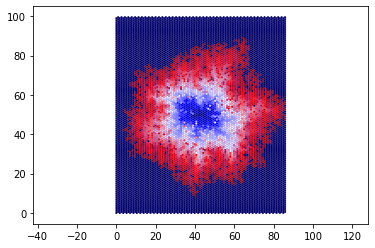

In [13]:
hex_plot = HexPlot()
hex_plot.plot_hexagonal_grid(shortest_path_field_truncated,continuousColor="seismic") 
hex_plot.plt.rcParams['figure.figsize'] = (30, 30)
hex_plot.show()   
